<a href="https://colab.research.google.com/github/jansoe/Lehre/blob/main/Convolution_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Basics

In [4]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

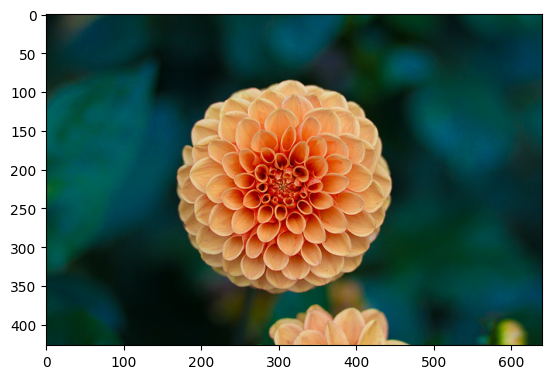

In [11]:
img = sklearn.datasets.load_sample_image('flower.jpg')
_ = plt.imshow(img)

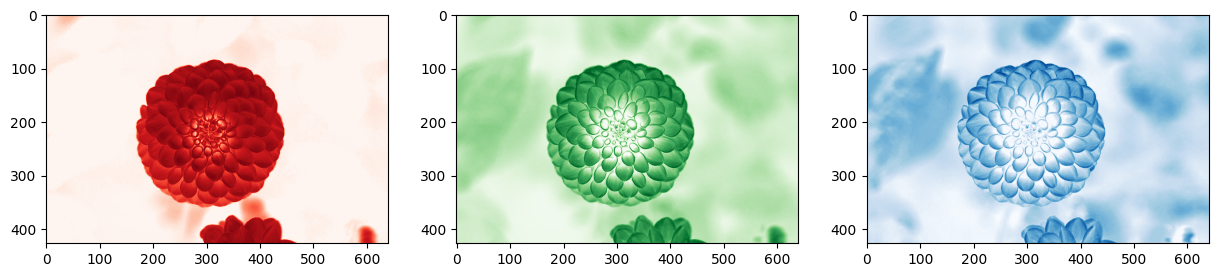

In [12]:
rgba = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.gray]

fig, ax = plt.subplots(1, 3, figsize=(15,5))
for ix in range(3):
    ax[ix].imshow(img[:,:,ix], cmap=rgba[ix])

In [13]:
bw_img = img.mean(axis=2) # convert to graysacle image

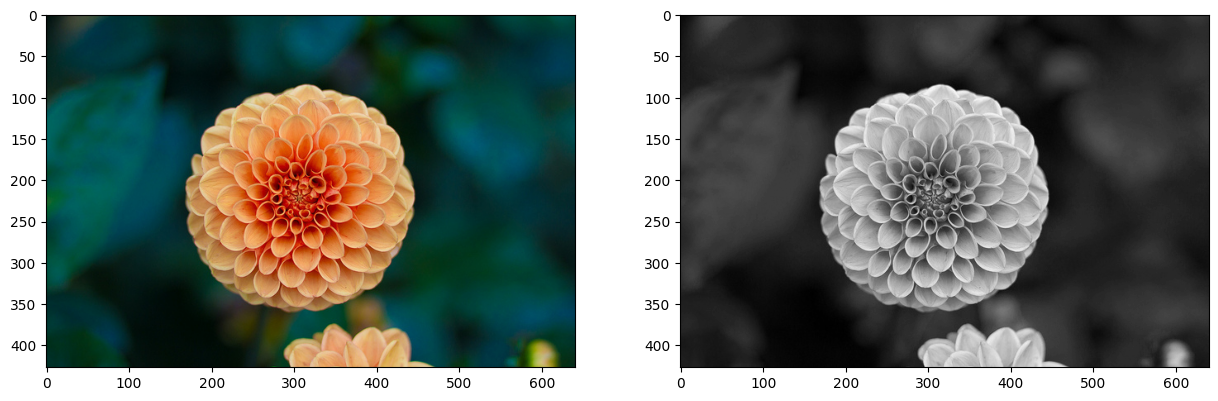

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(img)
ax[1].imshow(bw_img, cmap=plt.cm.gray)

# Convolution

A filter is a small matrix. If we convolve an image with a filter, the filter is applied to all cutouts of the image

In [15]:
from scipy.signal import convolve2d

In [42]:
# create filter
filt_size = 9
filt = np.ones((filt_size, filt_size))
filt /= filt.sum()

# use filter
filt_img = convolve2d(bw_img, filt)

In [25]:
filt

array([[0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],
       [0.01234568, 0.01234568, 0.01234568, 0.01234568, 0.01234568,
        0.01234568, 0.01234568, 0.01234568, 0.01234568],


In [43]:
#@title
#@markdown Function for plotting image and filter

def plot_convolution(image, filt, convolution):

    plt.figure(figsize = (15,15))
    plt.subplot(1,3,1)
    plt.title('Orginalbild')
    plt.imshow(image,cmap = 'gray')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('Filter')
    plt.imshow(filt, cmap= 'gray_r', vmin=-1, vmax=1)
    plt.axis('off')
    plt.xlim(-10,15)
    plt.ylim(-10,15)

    plt.subplot(1,3,3)
    plt.title('Faltung')
    plt.imshow(convolution,cmap = 'gray')
    plt.axis('off')

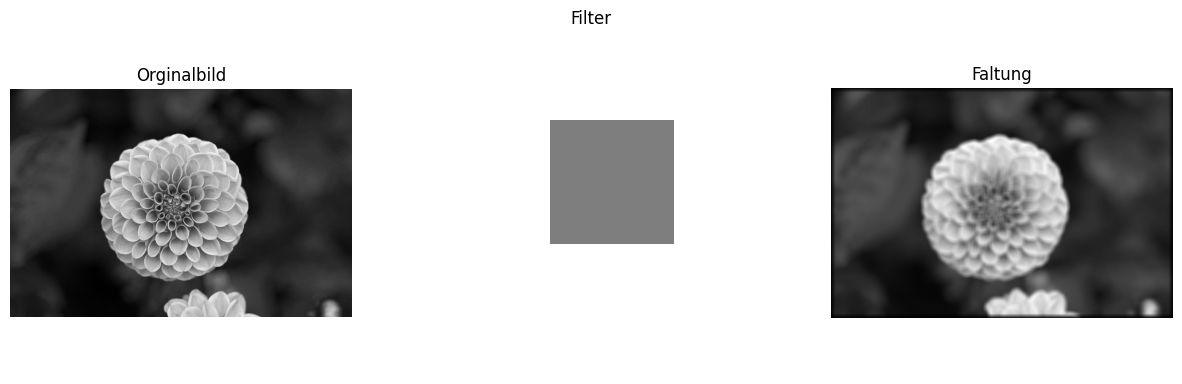

In [44]:
plot_convolution(bw_img, filt, filt_img)

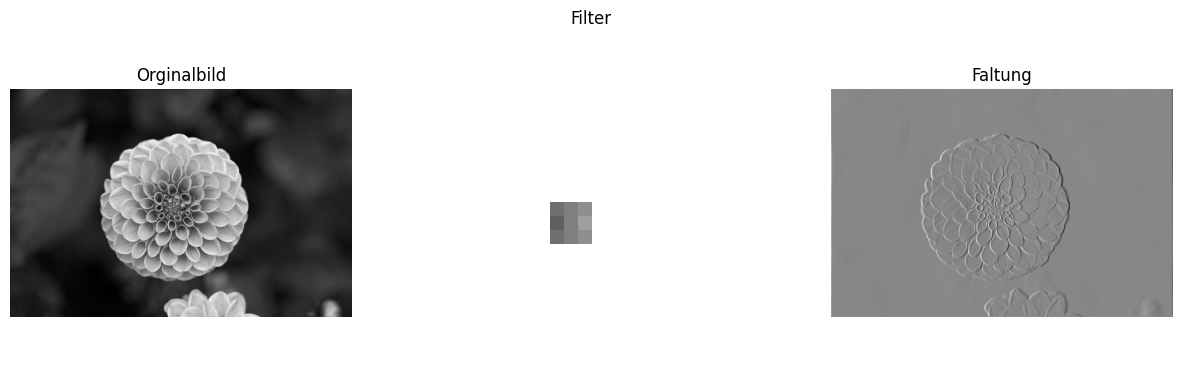

In [48]:
# sobel filter
filt = np.array([[1.,0.,-1.],
                 [2.,0.,-2.],
                 [1.,0.,-1.]])
filt /= np.abs(filt).sum()

filt_img = convolve2d(bw_img,filt)
plot_convolution(bw_img, filt, filt_img)

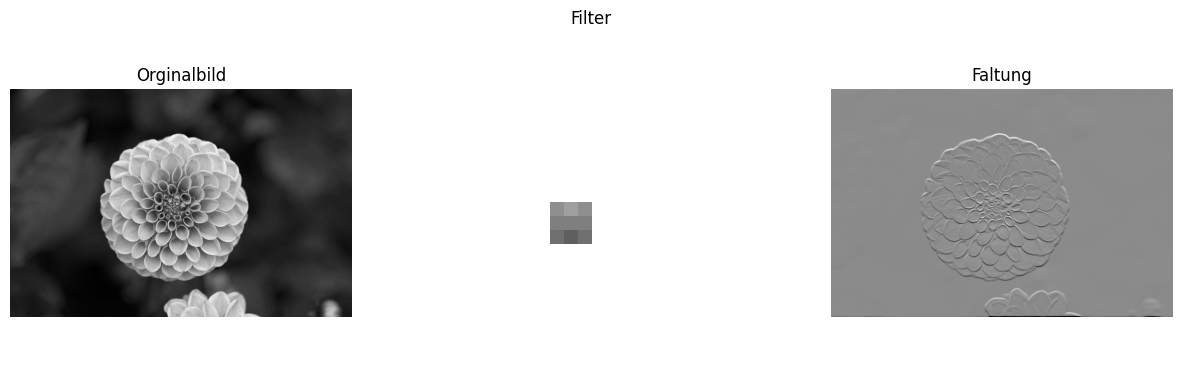

In [51]:
#  sobel-filter (horizontal)
f1 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1,-2,-1]], dtype='float')
f1 /= np.abs(f1).sum()


filt_img = convolve2d(bw_img, f1)
plot_convolution(bw_img, f1, filt_img)